# Testing
### Nachnamen der aktuellen Wohnbevölkerung der Stadt Zürich
Datum: 11.11.2021

**Importiere die notwendigen Packages**

In [89]:
#pip install geopandas altair fiona requests folium mplleaflet contextily seaborn datetime plotly

In [90]:
import pandas as pd
import pivottablejs
from pivottablejs import pivot_ui
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from datetime import datetime
import geopandas as gpd
import folium 
import requests

In [91]:
import plotly.express as px


Definiere Settings. Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen), 

In [92]:
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

Importiere einen Datensatz von der **DWH_INT** Dropzone.

- Beachte dabei die Notation des Pfades...
- Definiere mal aktuell noch keine weiteren Parameter beim Import

**Dataset auf INTEG Datenkatalog**: https://data.integ.stadt-zuerich.ch/dataset/int_dwh_bev_bestand_nachnamen_stadtquartier_od3710
**Dataset auf PROD Datenkatalog**: https://data.stadt-zuerich.ch/dataset/bev_bestand_nachnamen_stadtquartier_od3710

In [93]:
#Die Datasets sind nur zum Testen auf INT-DWH-Dropzone. Wenn der Test vorbei ist, sind sie auf PROD. 
# Über den Status kann man einfach switchen

status = "prod";
print(status)

prod


In [94]:
# Filepath
if status == "prod":
    fp = r"//szh.loc/ssz/applikationen/OGD_Dropzone/DWH/bev_bestand_nachnamen_stadtquartier_OD3710/BEV371OD3710.csv"
else:
    fp = r"//szh.loc/ssz/applikationen/OGD_Dropzone/INT_DWH/bev_bestand_nachnamen_stadtquartier_OD3710/BEV371OD3710.csv"
    
print(fp)

//szh.loc/ssz/applikationen/OGD_Dropzone/DWH/bev_bestand_nachnamen_stadtquartier_OD3710/BEV371OD3710.csv


In [95]:
# Read the data
data2betested = pd.read_csv(
    fp, 
    sep=',',
   #usecols=[0,1,2,3,4,6],
   #names=['stationid','year','month','avgtemp','latitude','longitude','elevation','station','countryid','country'],
   #skiprows=1,
   # parse_dates=[0],
    parse_dates=True,
    #date_parser=lambda x: pd.to_datetime(x, format="%Y"), 
    #index_col="date_time",
    low_memory=False    
    )

In der Folge ein paar erste Tests:

In [96]:
type(data2betested)

pandas.core.frame.DataFrame

 - 1) Zeige eine kurze Vorschau der importierten Daten
 - 2) Weise die Datentypen aus
 - 3) Zeige die Shape (Umfang) des Datensatzes an

In [97]:
data2betested.head(3)

,Nachname,KreisSort,KreisLang,QuarSort,QuarLang,AnzBestWir
0,Müller,1,Kreis 1,11,Rathaus,24
1,Keller,1,Kreis 1,11,Rathaus,13
2,Schmid,1,Kreis 1,11,Rathaus,13


In [98]:
data2betested.dtypes

Nachname      object
KreisSort      int64
KreisLang     object
QuarSort       int64
QuarLang      object
AnzBestWir     int64
dtype: object

In [99]:
data2betested.shape

(22222, 6)

Beschreibe einzelne Attribute

In [100]:
data2betested.describe()

,KreisSort,QuarSort,AnzBestWir
count,22222,22222,22222
mean,7,71,20
std,3,34,439
min,1,11,1
25%,4,41,2
50%,7,72,3
75%,10,101,6
max,12,123,25534


Wie viele Nullwerte gibt es im Datensatz?

In [101]:
data2betested.isnull().sum()

Nachname      0
KreisSort     0
KreisLang     0
QuarSort      0
QuarLang      0
AnzBestWir    0
dtype: int64

Wandle die Spalte Jahr von Int zu **Datetime** um. Dies wird in den meisten Grafiken so benötigt.

In [102]:
#data2betested['Jahrgang']=pd.to_datetime(data2betested['Jahrgang'], format='%Y')

#TO DO --> setze das Datum auf den 31.12. der Jahres.
#test=data2betested[['StichtagDatJahr']].date().replace(month=12, day=31)

#data2betested

Bereite die Daten für die Grafik unten vor

In [103]:
grp_Kreis = data2betested.groupby("KreisLang")
len(grp_Kreis)

12

In [104]:
for key, group in grp_Kreis:
    print(key, len(group))


Kreis 1 872
Kreis 10 1687
Kreis 11 2555
Kreis 12 2017
Kreis 2 1935
Kreis 3 2387
Kreis 4 2032
Kreis 5 1285
Kreis 6 1547
Kreis 7 2588
Kreis 8 1562
Kreis 9 1755


In [105]:
#Hier nicht notwendig, da es keine Zeitangabe braucht.
#myJahr = "2020-01-01"
#aktuellesJahr=Jahre.get_group(myJahr)   
#aktuellesJahr

**Selektionen und Aggregationen**

Check this [Doku](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [106]:
#med_jg_sex = data2betested.groupby(['Jahrgang','SexLang'])[['AnzBestWir']].agg('median')
#anz_vn_sex_jg= data2betested.groupby(['Jahrgang', 'SexLang','Vorname' ])[['AnzBestWir']].sum()
anz_nn_quartier= data2betested.groupby(['QuarLang','KreisLang','Nachname' ])[['AnzBestWir']].sum()

anz_nn_quartier
# produces Pandas Series
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])['AnzBestWir'].sum()
# Produces Pandas DataFrame
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])[['AnzBestWir']].sum()
    

AnzBestWir
QuarLang    KreisLang Nachname              
Affoltern   Kreis 11  Abdi                 8
                      Abegg                2
                      Abraham             12
                      Achermann            4
                      Ackermann            8
...                                      ...
Wollishofen Kreis 2   Zürcher             13
                      von Allmen           3
                      von Arx              3
                      Özdemir              2
                      Öztürk               2

[22222 rows x 1 columns]

In [107]:
data2betested["FirstLetter"]= data2betested["Nachname"].astype(str).str[0]
data2betested["SecondLetter"]= data2betested["Nachname"].astype(str).str[1]
data2betested["FirstTwoLetters"]= data2betested["Nachname"].str.slice(stop=2)
data2betested.sort_values(by='AnzBestWir', ascending=False, inplace=True, na_position='first')


In [121]:
sel_forpivot =data2betested[(data2betested.AnzBestWir>0)&(data2betested.Nachname != "Andere")]

forpivot = sel_forpivot
forpivot \
    .groupby(['QuarLang','KreisSort','KreisLang','Nachname', 'FirstLetter', 'FirstTwoLetters','AnzBestWir']) \
    .agg(sum_AnzBestWir=('AnzBestWir', 'sum')) \
    .query('AnzBestWir > 0') \
    .sort_values('AnzBestWir', ascending=False) \
    .head(3)

,,,,,,,sum_AnzBestWir
QuarLang,KreisSort,KreisLang,Nachname,FirstLetter,FirstTwoLetters,AnzBestWir,
Höngg,10,Kreis 10,Müller,M,Mü,190,190
Altstetten,9,Kreis 9,Müller,M,Mü,175,175
Albisrieden,9,Kreis 9,Müller,M,Mü,173,173


### Daten in interaktiver Treemap zeigen
Dazu gibt es eine sehr nützliche Webseite https://plotly.com/python/treemaps/
Zu Farbskalen, siehe: https://plotly.com/python/builtin-colorscales/

In [122]:

df = sel_forpivot
fig = px.treemap(df, path=[px.Constant("Alphabet"), 'FirstLetter', 'FirstTwoLetters', 'Nachname'], values='AnzBestWir',
                color='AnzBestWir', hover_data=['Nachname'],
                color_continuous_scale='blugrn')
                #color_continuous_midpoint=np.average(df['AnzBestWir'], weights=df['AnzBestWir']))
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=250, b=25))

fig.show()



In [112]:
df = sel_forpivot
fig = px.treemap(df, path=[px.Constant("Nach Kreis"), 'KreisLang', 'Nachname'], values='AnzBestWir',
                color='AnzBestWir', hover_data=['Nachname'],
                color_continuous_scale='blues')
                #color_continuous_midpoint=np.average(df['AnzBestWir'], weights=df['AnzBestWir']))
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=250, b=25))
fig.show()

### Einfache Visualisierungen zur Plausi

Exploriere die Daten mit Pivottable.JS

In [113]:
from pivottablejs import pivot_ui

pivot_ui(forpivot)

Liniendiagramm 
[Link zur Doku](https://altair-viz.github.io/gallery/multiline_highlight.html)

In [16]:
mySelection = data2betested[(data2betested.QuarSort>100)]
agg_mySelection= mySelection.groupby(['Nachname', 'QuarLang', 'KreisLang' ])[['AnzBestWir']].sum()
agg_mySelection.head()
#mySelection.head()
#agg_mySelection.dtypes


AnzBestWir
Nachname QuarLang             KreisLang            
Abdi     Affoltern            Kreis 11            8
         Hirzenbach           Kreis 12            3
         Höngg                Kreis 10            1
         Oerlikon             Kreis 11            3
         Schwamendingen-Mitte Kreis 12            2

In [17]:
agg_mySelection = agg_mySelection[["AnzBestWir"]]
agg_mySelection
mySelection


,Nachname,KreisSort,KreisLang,QuarSort,QuarLang,AnzBestWir
15963,Müller,10,Kreis 10,101,Höngg,190
15964,Schmid,10,Kreis 10,101,Höngg,108
15965,Meier,10,Kreis 10,101,Höngg,124
15966,Fischer,10,Kreis 10,101,Höngg,75
15967,Weber,10,Kreis 10,101,Höngg,88
...,...,...,...,...,...,...
22217,Hyseni,12,Kreis 12,123,Hirzenbach,1
22218,Scholz,12,Kreis 12,123,Hirzenbach,1
22219,Bodmer,12,Kreis 12,123,Hirzenbach,1
22220,Schubert,12,Kreis 12,123,Hirzenbach,1


In [18]:
# df_statzonen = df_statzonen[(df_statzonen.knr>0) & (df_statzonen.qname!="Hirslanden")]
#aktuellesJahr[[aktuellesJahr.KreisSort =7]])

myGraphic=data2betested[(data2betested.QuarSort>29)&(data2betested.QuarSort<70)&(data2betested.AnzBestWir>25)&(data2betested.Nachname != "Andere")]

highlight = alt.selection(type='single', on='mouseover',
                          fields=['QuarLang'], nearest=True)
#x='date:StichtagDatJahr',
base = alt.Chart(myGraphic).encode(
    x='Nachname',
    y='AnzBestWir',
    color='QuarLang'
)

points = base.mark_circle().encode(
    opacity=alt.value(0.75)
).add_selection(
    highlight
).properties(
    width=700 , height=500
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1.5), alt.value(4))
).interactive()

points + lines

alt.LayerChart(...)

In [19]:
alt.Chart(myGraphic).mark_circle(size=60).encode(
    x='Nachname',
    y='AnzBestWir',
    color='QuarLang',
    tooltip=['QuarLang','Nachname','AnzBestWir']
).interactive() # this makes the axes interactive: now you can zoom & pan



alt.Chart(...)

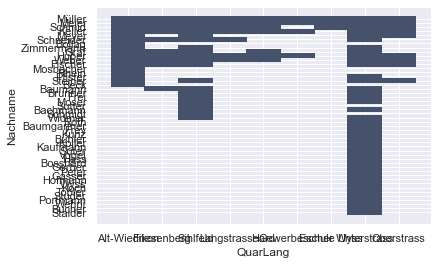

In [20]:
import seaborn as sns
sns.set(style="darkgrid")
sns.histplot(data=myGraphic, x="QuarLang", y="Nachname") #, y="Nachname")
plt.show();

Test: Choroplethenkarte

**Test: Choroplethenkarte**
Importiere die Geodaten als GeoJSON

In [21]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html
# Filepath statzonen
input_statzonen = r"//szh.loc/ssz/data/GIS/Daten/Vektor/_aktuell/stzh.adm_statzonen_map.json"
df_statzonen = gpd.read_file(input_statzonen)
df_statzonen.head(2)


,objectid,objid,stznr,stzname,qnr,qname,knr,kname,geometry
0,1,154,7303,Hegibach,73,Hirslanden,7,Kreis 7,"POLYGON ((8.55670 47.36407, 8.55670 47.36406, ..."
1,2,89,7302,Klus,73,Hirslanden,7,Kreis 7,"POLYGON ((8.57281 47.35806, 8.57274 47.35804, ..."


Joine die importierten statistischen Daten des aktuellen Jahres zum Geodatensatz:

*Siehe dazu Doku zu [Geopandas](https://geopandas.org/docs/user_guide/mergingdata.html)*

Test, download GeoJSON via WFS

Bei Proxy-Problemen --> Skript unter H:\Dokumente\myPy\proxy_settings und mit Anaconda-Prompt laufen lassen.

In [24]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html
# url = "http://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_land.geojson"
# df = geopandas.read_file(url)


url = "https://www.ogd.stadt-zuerich.ch/wfs/geoportal/Statistische_Quartiere?service=WFS&version=1.1.0&request=GetFeature&outputFormat=GeoJSON&typename=adm_statistische_quartiere_map"
df_adm_statistische_quartiere_map = gpd.read_file(url)

df_adm_statistische_quartiere_map.head(5)


,id,kname,knr,objectid,objid,qname,qnr,geometry
0,adm_statistische_quartiere_map.1,Kreis 7,7,1,34,Hirslanden,73,"POLYGON ((8.55670 47.36406, 8.55682 47.36410, ..."
1,adm_statistische_quartiere_map.2,Kreis 8,8,2,33,Weinegg,83,"POLYGON ((8.55670 47.36405, 8.55672 47.36403, ..."
2,adm_statistische_quartiere_map.3,Kreis 8,8,3,32,Mühlebach,82,"POLYGON ((8.55423 47.36456, 8.55426 47.36452, ..."
3,adm_statistische_quartiere_map.4,Kreis 8,8,4,31,Seefeld,81,"POLYGON ((8.54795 47.36500, 8.54805 47.36489, ..."
4,adm_statistische_quartiere_map.7,Kreis 4,4,7,16,Werd,41,"POLYGON ((8.53300 47.37394, 8.53299 47.37392, ..."


#Link https://automating-gis-processes.github.io/site/notebooks/L5/interactive-map-folium.html

# Create a Map instance
m = folium.Map(location=[60.25, 24.8], tiles = 'cartodbpositron', zoom_start=10, control_scale=True)

# Plot a choropleth map
# Notice: 'geoid' column that we created earlier needs to be assigned always as the first column
folium.Choropleth(
    geo_data=data,
    name='Population in 2018',
    data=data,
    columns=['geoid', 'pop18'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    line_color='white',
    line_weight=0,
    highlight=False,
    smooth_factor=1.0,
    #threshold_scale=[100, 250, 500, 1000, 2000],
    legend_name= 'Population in Helsinki').add_to(m)

#Show map
m

Noch zu prüfen, folgendes schöne Beispiel: https://docs.bokeh.org/en/latest/docs/user_guide/interaction/legends.html

Konkrete Beispiele von Bookeh in Jupyter NB: https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html